In [3]:
# 1 Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) 
# jest większa od 3. kwartyla rozkładu liczby głosów.

# 2 Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget)
# w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie 
# na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni 
# budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. 
# Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza 
# obszarem osi. Przykład wykresu widoczny poniżej:

# 3 Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z 
# bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

# 4 Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w 
# bazie?

# 5 Filmy, którego gatunku trwają średnio najdłużej (runtime)?

# 6 Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem 
# trwania.


In [124]:
# manipulacja danymi

import numpy as np
import pandas as pd

# wizualizacja

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline 
# Jeśli korzystasz z Jupyter Notebook lokalnie, niezbędne do wyświetlania wykresów w notebooku będzie wprowadzenie tej
#komendy

# Raport,do tworzenia podstawowego EDA

from pandas_profiling import ProfileReport

# Date Visualisation
import datetime as dt

In [1]:
# 1 Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) 
# jest większa od 3. kwartyla rozkładu liczby głosów.

In [47]:
df = pd.read_csv('tmdb_movies.csv')

In [10]:
profile = ProfileReport(df, title="Movies -  Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

df

In [65]:
df

Unnamed: 0     budget  \
0              0  237000000   
1              1  300000000   
2              2  245000000   
3              3  250000000   
4              4  260000000   
...          ...        ...   
4798        4798     220000   
4799        4799       9000   
4800        4800          0   
4801        4801          0   
4802        4802          0   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.go.com/disneypictures/pirates/     285   
2           http://www.sonypictures.com/movies/spectre/  206647   
3                    http://www.thedarkknightrises.com/   49026   
4                  http://movies.disney.com/john-carter   49529   
...                                                 ...     ...   
4798                                                NaN    9367   
4799                                                NaN   72766   
4800  http://www.hallmarkchannel.com/signedsealeddel...  231617   
4801                        http://shanghaicalling.com/  126186   
4802                                                NaN   25975   

     original_language                            original_title  \
0                   en                                    Avatar   
1                   en  Pirates of the Caribbean: At World's End   
2                   en                                   Spectre   
3                   en                     The Dark Knight Rises   
4                   en                               John Carter   
...                ...                                       ...   
4798                es                               El Mariachi   
4799                en                                 Newlyweds   
4800                en                 Signed, Sealed, Delivered   
4801                en                          Shanghai Calling   
4802                en                         My Date with Drew   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4798  El Mariachi just wants to play his guitar and ...   14.269792   
4799  A newlywed couple's honeymoon is upended by th...    0.642552   
4800  "Signed, Sealed, Delivered" introduces a dedic...    1.444476   
4801  When ambitious New York attorney Sam is sent t...    0.857008   
4802  Ever since the second grade when he first saw ...    1.929883   

     release_date     revenue  runtime    status  \
0      2009-12-10  2787965087    162.0  Released   
1      2007-05-19   961000000    169.0  Released   
2      2015-10-26   880674609    148.0  Released   
3      2012-07-16  1084939099    165.0  Released   
4      2012-03-07   284139100    132.0  Released   
...           ...         ...      ...       ...   
4798   1992-09-04     2040920     81.0  Released   
4799   2011-12-26           0     85.0  Released   
4800   2013-10-13           0    120.0  Released   
4801   2012-05-03           0     98.0  Released   
4802   2005-08-05           0     90.0  Released   

                                                tagline  \
0                           Enter the World of Pandora.   
1        At the end of the world, the adventure begins.   
2                                 A Plan No One Escapes   
3                                       The Legend Ends   
4                  Lost in our world, found in another.   
...                                                 ...   
4798  He didn't come looking for trouble, but troubl...   
4799  A newlywed couple's honeymoon is upended by th...   
48

In [49]:
df['release_date'] = pd.to_datetime(df['release_date']) # Converting release_date with the datetime accessor dt to access
# datetime components

In [66]:
dfsample = df[(df['release_date'].dt.year >= 2010) & (df['release_date'].dt.year <= 2016)][['original_title','budget', 'revenue','release_date']]

In [69]:
dfsample['year'] = df['release_date'].dt.year

In [75]:
dfsample.drop('release_date', axis = 1, inplace = True)

In [76]:
dfsample

original_title     budget     revenue    year
2                          Spectre  245000000   880674609  2015.0
3            The Dark Knight Rises  250000000  1084939099  2012.0
4                      John Carter  260000000   284139100  2012.0
6                          Tangled  260000000   591794936  2010.0
7          Avengers: Age of Ultron  280000000  1405403694  2015.0
...                            ...        ...         ...     ...
4787      All Superheroes Must Die          0           0  2011.0
4794  Sanctuary: Quite a Conundrum          0           0  2012.0
4799                     Newlyweds       9000           0  2011.0
4800     Signed, Sealed, Delivered          0           0  2013.0
4801              Shanghai Calling          0           0  2012.0

[1445 rows x 4 columns]

In [77]:
dfsampleprofile = ProfileReport(dfsample, title="Movies -  Report")
dfsampleprofile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
#df['vote_count'] Getting the 0,75 th quantile (Q3)
df.quantile(.75, numeric_only = True)['vote_count']

737.0

In [31]:
df['vote_count']> df.quantile(.75, numeric_only = True)['vote_count']

0        True
1        True
2        True
3        True
4        True
        ...  
4798    False
4799    False
4800    False
4801    False
4802    False
Name: vote_count, Length: 4803, dtype: bool

In [36]:
df[df['vote_count']> df.quantile(.75, numeric_only = True)['vote_count']].sort_values(by ='vote_average', ascending = False).head(10)

Unnamed: 0    budget                                    homepage  \
1881        1881  25000000                                         NaN   
3337        3337   6000000                http://www.thegodfather.com/   
2294        2294  15000000      http://movies.disney.com/spirited-away   
3865        3865   3300000           http://sonyclassics.com/whiplash/   
2731        2731  13000000                                         NaN   
3232        3232   8000000                                         NaN   
1818        1818  22000000              http://www.schindlerslist.com/   
662          662  63000000  http://www.foxmovies.com/movies/fight-club   
2170        2170    806948                                         NaN   
1847        1847  25000000        http://www.warnerbros.com/goodfellas   

          id original_language            original_title  \
1881     278                en  The Shawshank Redemption   
3337     238                en             The Godfather   
2294     129                ja                  千と千尋の神隠し   
3865  244786                en                  Whiplash   
2731     240                en    The Godfather: Part II   
3232     680                en              Pulp Fiction   
1818     424                en          Schindler's List   
662      550                en                Fight Club   
2170     539                en                    Psycho   
1847     769                en                GoodFellas   

                                               overview  popularity  \
1881  Framed in the 1940s for the double murder of h...  136.747729   
3337  Spanning the years 1945 to 1955, a chronicle o...  143.659698   
2294  A ten year old girl who wanders away from her ...  118.968562   
3865  Under the direction of a ruthless instructor, ...  192.528841   
2731  In the continuing saga of the Corleone crime f...  105.792936   
3232  A burger-loving hit man, his philosophical par...  121.463076   
1818  The true story of how businessman Oskar Schind...  104.469351   
662   A ticking-time-bomb insomniac and a slippery s...  146.757391   
2170  When larcenous real estate clerk Marion Crane ...   93.067866   
1847  The true story of Henry Hill, a half-Irish, ha...   63.654244   

     release_date    revenue  runtime    status  \
1881   1994-09-23   28341469    142.0  Released   
3337   1972-03-14  245066411    175.0  Released   
2294   2001-07-20  274925095    125.0  Released   
3865   2014-10-10   13092000    105.0  Released   
2731   1974-12-20   47542841    200.0  Released   
3232   1994-10-08  213928762    154.0  Released   
1818   1993-11-29  321365567    195.0  Released   
662    1999-10-15  100853753    139.0  Released   
2170   1960-06-16   32000000    109.0  Released   
1847   1990-09-12   46836394    145.0  Released   

                                                tagline  \
1881  Fear can hold you prisoner. Hope can set you f...   
3337                         An offer you can't refuse.   
2294     The tunnel led Chihiro to a mysterious town...   
3865    The road to greatness can take you to the edge.   
2731  I don't feel I have to wipe everybody out, Tom...   
3232  Just because you are a character doesn't mean ...   
1818    Whoever saves one life, saves the world entire.   
662                             Mischief. Mayhem. Soap.   
2170  The master of suspense moves his cameras into ...   
1847                Three Decades of Life in the Mafia.   

                         title  vote_average  vote_count  genre_id  
1881  The Shawshank Redemption           8.5        8205      18.0  
3337             The Godfather           8.4        5893      18.0  
2294             Spirited Away           8.3        3840      14.0  
3865                  Whiplash           8.3        4254      18.0  
2731    The Godfather: Part II           8.3        3338      18.0  
3232              Pulp Fiction           8.3        8428      53.0  
1818          Schindler's List           8.3        4

In [127]:
dfsamplegroup= pd.DataFrame(dfsample.groupby('year').mean(numeric_only = True)
dfsamplegroup

budget     revenue
year                         
2010.0  34.495411   90.438110
2011.0  34.772320   92.004131
2012.0  34.922032  116.065915
2013.0  35.523294  101.348456
2014.0  30.959888  101.346599
2015.0  31.132164  105.439927
2016.0  45.703269  139.049586

In [132]:
x = ['2010','2011','2012','2013','2014','2015','2016']

In [196]:
y_b = dfsamplegroup['budget']
y_r = dfsamplegroup['revenue']

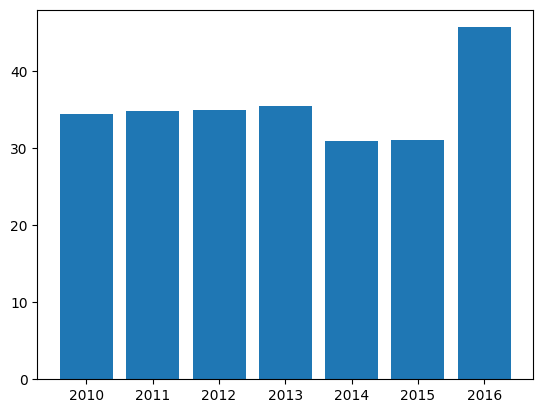

In [136]:
#fig = plt.figure()
fig = plt.bar(x,y)
#axes = fig.add_axes([0,0,1,1])
#axes.plot(x,y,label='Budget')

In [203]:
#fig = plt.bar(x,y_r)

#plt.plot
#fig = plt.figure()
#axes = fig.add_axes([0,0,1,1])
#axes.plot(x,y_b,label='Budget')

In [199]:
def million(x, pos):
        return 'PLN {:2.1f}M'.format(x*1e-6)

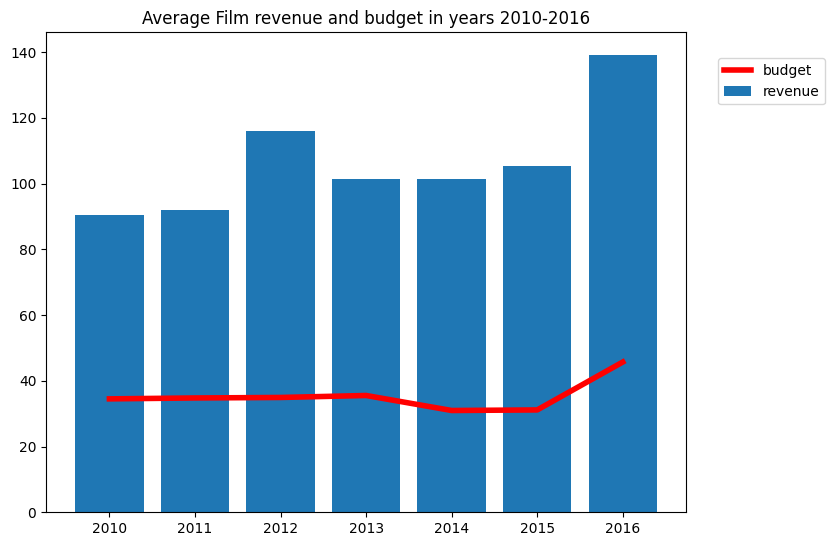

In [202]:
fig, ax = plt.subplots()
axes = fig.add_axes([0,0,1,1])

formatter = plt.FuncFormatter(million)
ax.yaxis.set_major_formatter(formatter)

axes.plot(x,y_b,
         color = 'red',
         label = 'budget',
         linewidth = 4
         )
axes.bar(x,y_r,
         label = 'revenue')


axes.set_title('Average Film revenue and budget in years 2010-2016')
axes.legend(loc=(1.05,0.85))

plt.show()

In [173]:
# 3 Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z 
# bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [236]:
dfg = pd.read_csv('tmdb_genres.csv')
dfg.rename(columns={'Unnamed: 0':'genre_id'}, inplace = True)
dfg

genre_id           genres
0       28.0           Action
1       12.0        Adventure
2       14.0          Fantasy
3       16.0        Animation
4      878.0  Science Fiction
5       18.0            Drama
6       53.0         Thriller
7    10751.0           Family
8       35.0           Comedy
9       36.0          History
10   10752.0              War
11      37.0          Western
12   10749.0          Romance
13      80.0            Crime
14    9648.0          Mystery
15      27.0           Horror
16      99.0      Documentary
17   10402.0            Music
18   10770.0         TV Movie
19       NaN              NaN
20   10769.0          Foreign

In [238]:
dfm =pd.merge(df,dfg,how = 'inner',left_on ='genre_id',right_on = 'genre_id')
dfm

Unnamed: 0     budget  \
0              0  237000000   
1              2  245000000   
2              3  250000000   
3              4  260000000   
4              7  280000000   
...          ...        ...   
4798        4714          0   
4799        4716          0   
4800        4801          0   
4801        4666     225000   
4802        4797          0   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1           http://www.sonypictures.com/movies/spectre/  206647   
2                    http://www.thedarkknightrises.com/   49026   
3                  http://movies.disney.com/john-carter   49529   
4     http://marvel.com/movies/movie/193/avengers_ag...   99861   
...                                                 ...     ...   
4798                                                NaN  282128   
4799                                                NaN   38786   
4800                        http://shanghaicalling.com/  126186   
4801                        http://detroitfirefilm.org/  139948   
4802                                                NaN   67238   

     original_language                                     original_title  \
0                   en                                             Avatar   
1                   en                                            Spectre   
2                   en                              The Dark Knight Rises   
3                   en                                        John Carter   
4                   en                            Avengers: Age of Ultron   
...                ...                                                ...   
4798                en                           An American in Hollywood   
4799                en  The Blood of My Brother: A Story of Death in Iraq   
4800                en                                   Shanghai Calling   
4801                en                                               Burn   
4802                en                                             Cavite   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     A cryptic message from Bond’s past sends him o...  107.376788   
2     Following the death of District Attorney Harve...  112.312950   
3     John Carter is a war-weary, former military ca...   43.926995   
4     When Tony Stark tries to jumpstart a dormant p...  134.279229   
...                                                 ...         ...   
4798  A talented young filmmaker from New York sets ...    0.015697   
4799  THE BLOOD OF MY BROTHER goes behind the scenes...    0.005256   
4800  When ambitious New York attorney Sam is sent t...    0.857008   
4801  A character-driven, action-packed documentary ...    0.126676   
4802  Adam, a security guard, travels from Californi...    0.022173   

     release_date     revenue  runtime    status  \
0      2009-12-10  2787965087    162.0  Released   
1      2015-10-26   880674609    148.0  Released   
2      2012-07-16  1084939099    165.0  Released   
3      2012-03-07   284139100    132.0  Released   
4      2015-04-22  1405403694    141.0  Released   
...           ...         ...      ...       ...   
4798   2014-07-18           0     89.0  Released   
4799   2005-11-25           0     90.0  Released   
4800   2012-05-03           0     98.0  Released   
4801   2012-11-01      111300     86.0  Released   
4802   2005-03-12           0     80.0  Released   

                                                tagline  \
0                           Enter the World of Pandora.   
1                                 A Plan No One Escapes   
2                                       The Legend Ends   
3                  Lost in our world, found in another.   
4                                   A New Age Has Come.   
...                                                 ...   
4798        

In [ ]:
# 4 Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w 
# bazie?

In [242]:
dfmg =dfm[['genres','genre_id']].groupby('genres').count()
dfmg.sort_values(by = 'genre_id', ascending = False).iloc[0:1,0:]
#.sortvalues(by ='genre_id')

genre_id
genres          
Drama       1207

In [ ]:
# 5 Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [249]:
dfmr =dfm[['genres','runtime']].groupby('genres').mean()
dfmr.sort_values(by = 'runtime', ascending = False).iloc[0:1,0:]

runtime
genres          
History   133.96

In [ ]:
# 6 Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem 
# trwania.

In [273]:
dfmr.sort_values(by = 'runtime', ascending = False, inplace = True)
dfmr

genres     runtime
0           History  133.960000
1               War  126.125000
2           Western  117.925926
3             Drama  115.521559
4         Adventure  113.061947
5             Crime  112.143590
6          TV Movie  110.500000
7            Action  109.058355
8   Science Fiction  109.031250
9           Romance  107.094340
10          Fantasy  106.487179
11         Thriller  105.690722
12            Music  102.852941
13          Mystery  100.609756
14           Comedy  100.464491
15           Horror   94.753333
16      Documentary   93.511364
17           Family   89.803571
18        Animation   89.552846
19          Foreign   83.000000

In [257]:
dfmr.reset_index(inplace = True)
dfmr.iloc[0,0]

'History'

In [278]:
dfm[dfm['genres'] == dfmr.iloc[0,0]][['runtime']].count()

runtime    25
dtype: int64

array([[<AxesSubplot: title={'center': 'runtime'}>]], dtype=object)

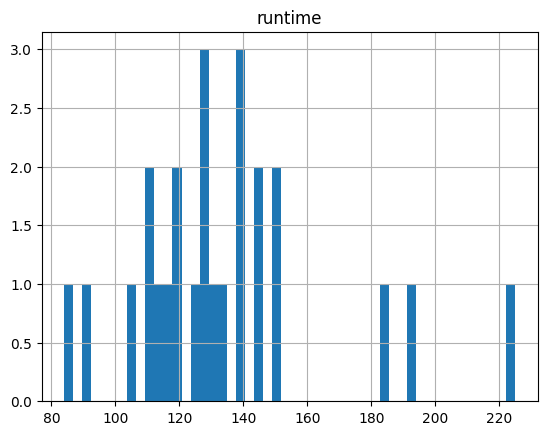

In [280]:
dfm[dfm['genres'] == dfmr.iloc[0,0]][['runtime']].hist(bins = 50)